In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
IBMQ.save_account('b6a64fd92bc0d0f5af8011f1800820500e02cfafc29bb98e2c13c746b883ffa885b544d9e0d286cac28786d034872f25f77be296e88ac9e8bef093cb659536fb')

configrc.store_credentials:WARNING:2021-05-06 13:23:08,190: Credentials already present. Set overwrite=True to overwrite.


In [2]:
n = 2

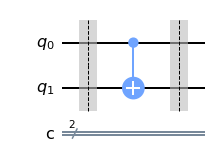

In [3]:
oracle_Balanceado0 = QuantumCircuit(n,n)

oracle_Balanceado0.barrier()
oracle_Balanceado0.cx(0,1)
oracle_Balanceado0.barrier()
oracle_Balanceado0.draw('mpl')

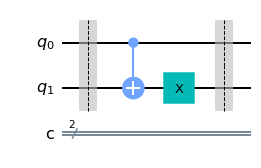

In [4]:
oracle_Balanceado1 = QuantumCircuit(n,n)

oracle_Balanceado1.barrier()
oracle_Balanceado1.cx(0,1)
oracle_Balanceado1.x(1)
oracle_Balanceado1.barrier()
oracle_Balanceado1.draw('mpl')

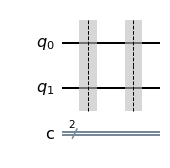

In [5]:
oracle_cosntante0 = QuantumCircuit(n,n)

oracle_cosntante0.barrier()
oracle_cosntante0.barrier()
oracle_cosntante0.draw('mpl')

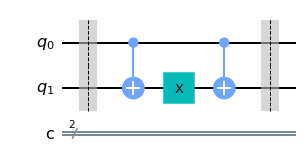

In [6]:
oracle_cosntante1 = QuantumCircuit(n,n)

oracle_cosntante1.barrier()
oracle_cosntante1.cx(0,1)
oracle_cosntante1.x(1)
oracle_cosntante1.cx(0,1)
oracle_cosntante1.barrier()
oracle_cosntante1.draw('mpl')

In [7]:
oracles = dict()
oracles['cosntante1'] = oracle_cosntante1
oracles['cosntante0'] = oracle_cosntante0
oracles['Balanceado0'] = oracle_Balanceado0
oracles['Balanceado1'] = oracle_Balanceado1

In [8]:
def crear_oracle(oracle):
    oracle_qc = QuantumCircuit(n,n)
    oracle_qc.x(1)
    oracle_qc.barrier()
    oracle_qc.h(1)
    oracle_qc.h(0)
 
    oracle_qc += oracles[oracle]

    oracle_qc.h(0)
    #oracle_qc.measure_all()
    return oracle_qc

# Ejecucion en un simulador

### Oraculo constante0

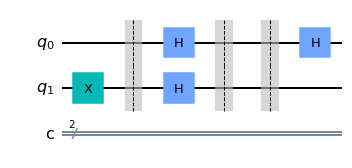

In [9]:
dj_circuit = crear_oracle('cosntante0')
dj_circuit.draw('mpl')

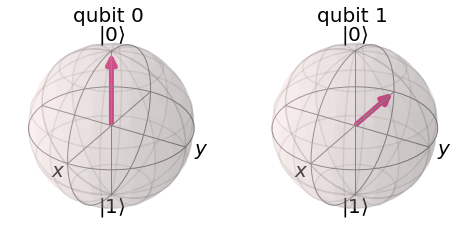

In [10]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(dj_circuit)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Como vemos, tras aplicar el algoritmo con el oraculo de constantes, el qubit 0 esta en el estado 0, por lo que es nuestro resultado esperado. Ya que siempre en este tipo de oraculo, siempre nos dara el mismo numero.

In [11]:
dj_circuit.measure([0,1],[0,1])

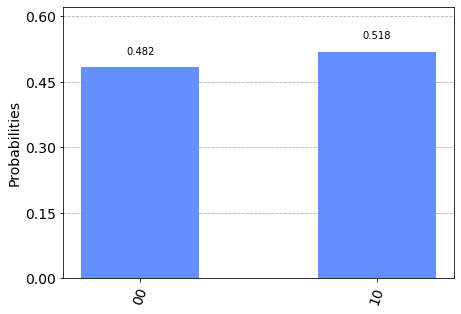

In [12]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### Oraculo Constante 1

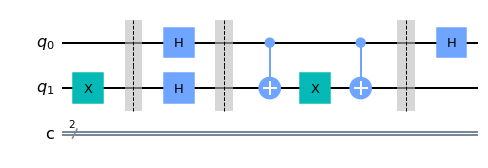

In [13]:
dj_circuit = crear_oracle('cosntante1')
dj_circuit.draw('mpl')

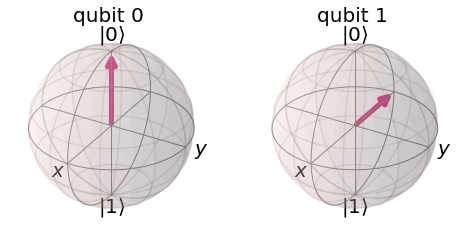

In [14]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(dj_circuit)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Como vemos, tras aplicar el algoritmo con el oraculo de constantes, el qubit 0 esta en el estado 0, por lo que es nuestro resultado esperado. Ya que siempre en este tipo de oraculo, siempre nos dara el mismo numero.

In [15]:
dj_circuit.measure([0,1],[0,1])

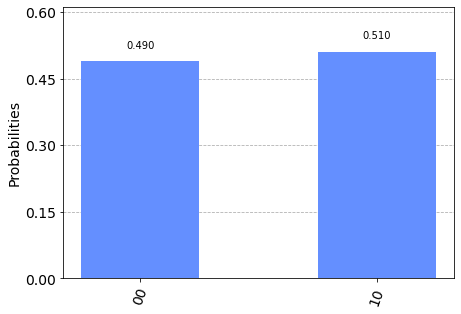

In [16]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### Oraculo Balanceado 1

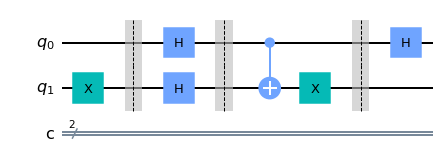

In [17]:
dj_circuit = crear_oracle('Balanceado1')
dj_circuit.draw('mpl')

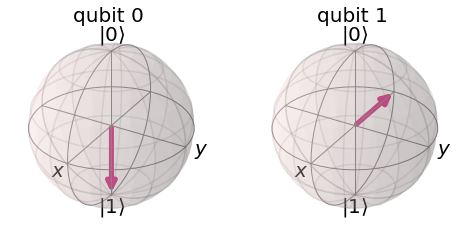

In [18]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(dj_circuit)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Como observamos, al aplicar el algoritmo de Deutsch en el oraculo balanceado, el qubit 0 nos da como resultado 1.

In [19]:
dj_circuit.measure([0,1],[0,1])

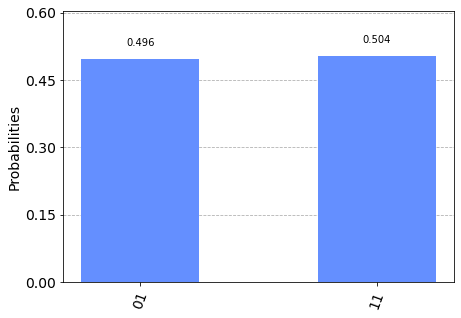

In [20]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### Oraculo Balanceado 0

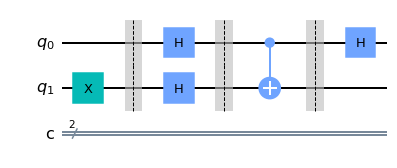

In [21]:
dj_circuit = crear_oracle('Balanceado0')
dj_circuit.draw('mpl')

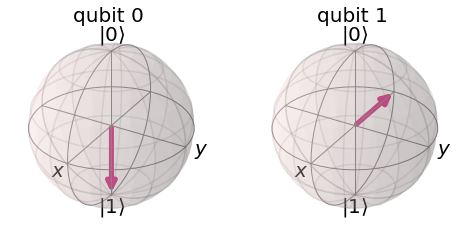

In [22]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(dj_circuit)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Como observamos, al aplicar el algoritmo de Deutsch en el oraculo balanceado, el qubit 0 nos da como resultado 1.

In [23]:
dj_circuit.measure([0,1],[0,1])

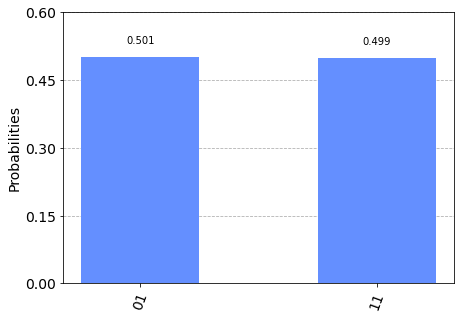

In [24]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

# Ejecucion en un backend real

#### Balanceado 0

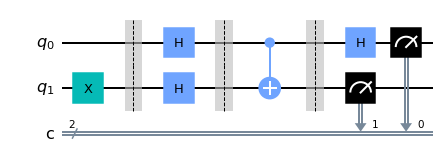

In [25]:
dj_circuit = crear_oracle('Balanceado0')
dj_circuit.measure([0,1],[0,1])
dj_circuit.draw('mpl')

In [26]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/home/feynman/anaconda3/envs/qiskitEnv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_quito


In [27]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


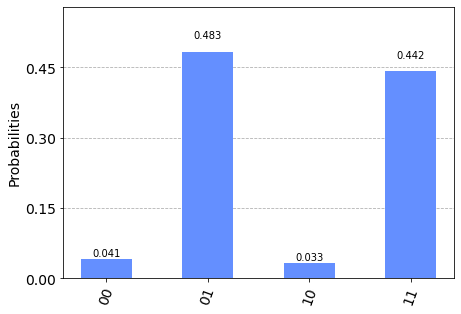

In [28]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Como era de esperar, con el ruido, sale un pequeño porcenteaje de resultado no esperado, pero hemos obtenido un una probabilidad de mas de 90% en devolvernos el resultado adecuado.

### Balanceado 1

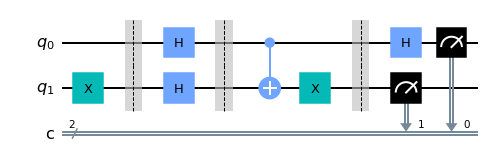

In [29]:
dj_circuit = crear_oracle('Balanceado1')
dj_circuit.measure([0,1],[0,1])
dj_circuit.draw('mpl')

In [30]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/home/feynman/anaconda3/envs/qiskitEnv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-05-06 13:28:34,223: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito


In [31]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


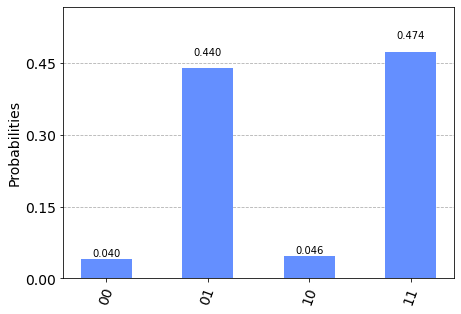

In [32]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

En este apartado ha ocurrido lo mismo que en la ejecucion en el backen real del anterior oraculo balanceado.

### Constante 1

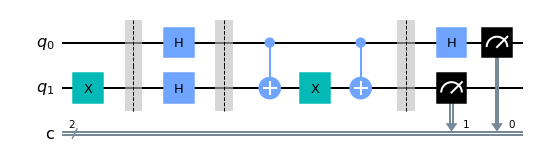

In [33]:
dj_circuit = crear_oracle('cosntante1')
dj_circuit.measure([0,1],[0,1])
dj_circuit.draw('mpl')

In [34]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-05-06 13:33:42,783: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito


In [35]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


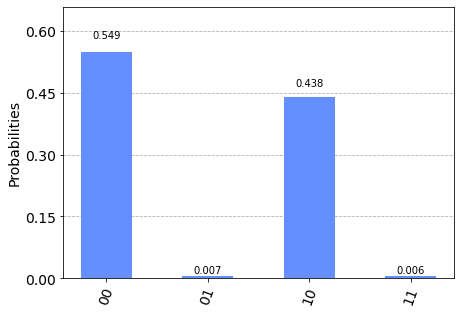

In [36]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Como era de esperar, con el ruido, sale un pequeño porcenteaje de resultado no esperado, pero hemos obtenido un una probabilidad de mas de 98% en devolvernos el resultado adecuado.

### Constante 0

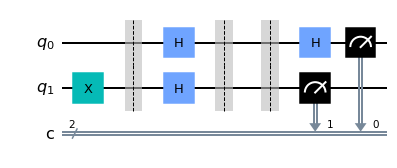

In [37]:
dj_circuit = crear_oracle('cosntante0')
dj_circuit.measure([0,1],[0,1])
dj_circuit.draw('mpl')

In [38]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-05-06 13:38:32,267: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito


In [39]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


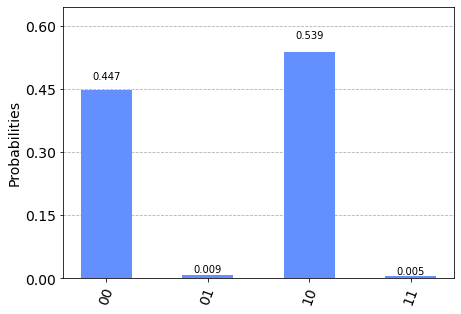

In [40]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

En este apartado ha ocurrido lo mismo que en la ejecucion en el backen real del anterior oraculo constante.